In [20]:
# K-Means is an example of Hard Clustering, where every point belongs only to one cluster.

# Step 1: Define the K centroids - Initialise these at random.
# Step 2a: Update cluster assignments - Assign each data point to one of the nearest K clusters.
# Step 2b: Update centroids - Move the centroid to the center of their clusters.
# Repeat Steps (2a,2b) until convergence.

In [2]:
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs 

In [3]:
X,y = make_blobs(n_samples=500, n_features=2,centers=5,random_state=3)    # x is the datapoints and y is 5 classes.

In [5]:
print(X.shape)

(500, 2)


In [6]:
np.unique(y)     # y is not used in K-Mean y is unlabelled and unsupervised learning.

array([0, 1, 2, 3, 4])

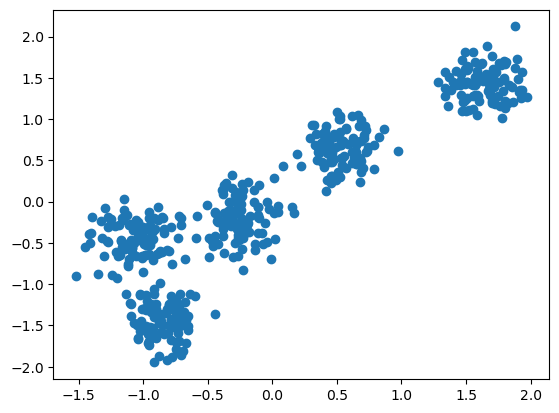

In [4]:
# Data Visualization and normalizing the data
def normalise(X):
    u = X.mean(axis=0)
    std = X.std(axis=0)
    return (X-u)/std

X = normalise(X)

plt.scatter(X[:,0], X[:,1])
plt.show()

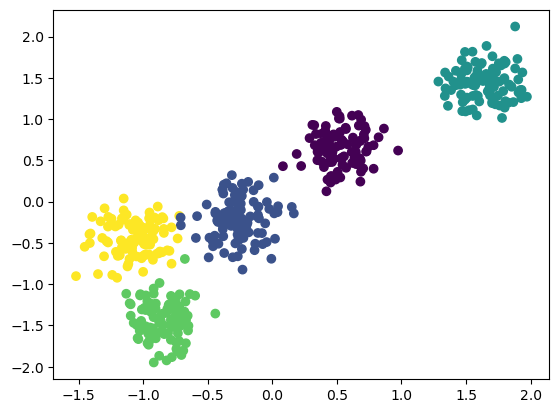

In [5]:
# Data Visualization
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [13]:
# as you can see there are 5 clusters with K = 5

In [10]:
# implementation of K-Mean

In [14]:
# Init the K-centers for K clusters

In [6]:
k = 5
colors = ["green", "red", "blue", "yellow", "orange"]

for i in range(k):
    center = np.random.random(2,)
    print(center)

[0.77900366 0.94735651]
[0.40448771 0.11184589]
[0.80237754 0.47183314]
[0.74875361 0.74143738]
[0.37002926 0.04939405]


In [21]:
# when random is used, it will generate data in the range 0 to 1. But I want the data to be in the range -1 to 1. 
#So, multiply(0,1) by 2 (here it is n_features) and then subtract by 1. 
# now, multiple it by K to get the range from -K to +K.
# Usecase: pizza consumption in 3 areas, and I want to open a new shop.

In [8]:
k = 5
colors = ["green", "red", "blue", "yellow", "orange"]
n_features = 2

centroids = {}      # the random point selected by you. 

for i in range(k):
    center = (2*np.random.random((n_features,)) -1)

    centroids[i] = {
        'center' : center,
        'color' : colors[i],
        'points' : []
    }     
    print(center)

[-0.22949597  0.07103066]
[ 0.23538151 -0.27090128]
[-0.27685821 -0.54078717]
[0.77011434 0.00897385]
[0.08829882 0.02860334]


In [9]:
def distance(p,q):
    return np.sqrt(np.sum((p-q)**2))

In [17]:
#Step 2a

def assignPtsToCluster(X, centroids):
    m = X.shape[0]

    # each point will be assigned to exactly one of the clusters
    for i in range(m):
        cdist = []
        cx = X[i]
        # find out distance of pt from each centroid
        for kx in range(k):
            d = distance(centroids[kx]['center'],cx)
            cdist.append(d)

        clusterId = np.argmin(cdist)
        #assign the point to the list of points that current_cluster holds
        centroids[clusterId]['points'].append(cx)


In [15]:
assignPtsToCluster(X, centroids)

In [16]:
centroids

{0: {'center': array([-0.22949597,  0.07103066]),
  'color': 'green',
  'points': [array([-0.23629145, -0.20918178]),
   array([-0.35732124, -0.13320514]),
   array([-0.32522576, -0.10414324]),
   array([-0.14528577,  0.13814113]),
   array([-0.24454816,  0.05525333]),
   array([-0.10690982, -0.06108972]),
   array([-0.38623727,  0.14499077]),
   array([-0.30818121,  0.16670618]),
   array([-0.10774585, -0.1906123 ]),
   array([-0.33709384, -0.14246429]),
   array([-0.26724426, -0.03180911]),
   array([-0.35476169,  0.22309236]),
   array([-0.3130588 ,  0.32129065]),
   array([-0.24375018, -0.02408795]),
   array([-0.31928455, -0.00941968]),
   array([-0.58228341, -0.17532636]),
   array([-0.33399155, -0.00693552]),
   array([-0.44021412, -0.12332956]),
   array([-0.23557432,  0.21798879]),
   array([-1.15057697,  0.03816438]),
   array([-0.14410682, -0.00233778]),
   array([-0.37253988, -0.13973784]),
   array([-0.23559442,  0.07024666]),
   array([-0.72057303, -0.17244888]),
   array

In [18]:
# Step 2b

In [22]:
def updateClusters(centroids):
    # Update every centroid by taking a mean of the points assigned to the cluster
    for kx in range(k):
        pts = np.array(centroids[kx]['points'])

        # if a cluster has non-zero points
        if pts.shape[0]  > 0:
            newCenter = pts.mean(axis = 0)
            centroids[kx]['center'] = newCenter
            centroids[kx]['points'] = [] # clear the list for step 2a

In [23]:
def plotClusters(centroids):

    for kx in range(k):
        pts = np.array(centroids[kx]['points'])

        if(pts.shape[0]>0):
            plt.scatter(pts[:,0], pts[:,1], color=centroids[kx]['color'])

        #plot the Cluster Center (Centroid)
        uk = centroids[kx]['center']
        plt.scatter(uk[0], uk[1], color=centroids[kx]['color'],marker='*')

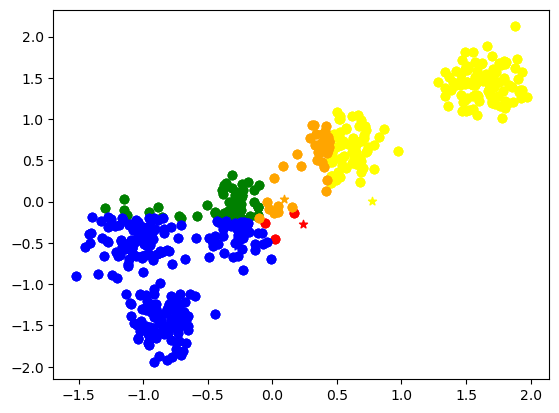

In [25]:
assignPtsToCluster(X, centroids)
plotClusters(centroids)

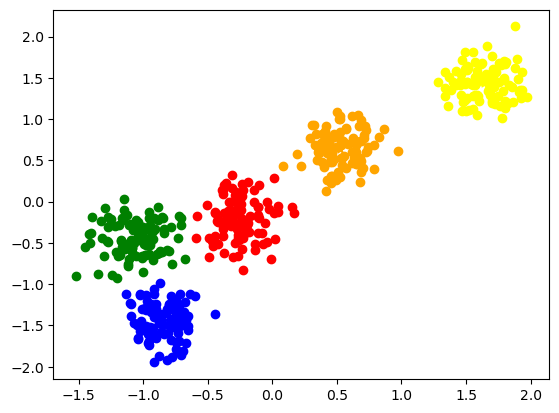

In [32]:
assignPtsToCluster(X, centroids)
plotClusters(centroids)
updateClusters(centroids)
#run this multiple times or put this in a loop

In [33]:
# note that the how good or bad the results are depends on the initialization

In [34]:
# More info and read more on:
# 1. Initialization strategies
# 2. Impreveoemt